# Earthquakes 1990-2023


In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('data/Earthquakes-1990-2023.csv')

In [5]:
df.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [6]:
df.shape

(3445751, 12)

In [7]:
df.describe()

,time,tsunami,significance,magnitudo,longitude,latitude,depth
count,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06
mean,1.247124e+12,4.434447e-04,7.400973e+01,1.774076e+00,-1.012876e+02,3.746483e+01,2.285387e+01
std,2.976292e+11,2.105346e-02,1.016364e+02,1.291055e+00,7.697416e+01,2.041577e+01,5.484938e+01
min,6.311534e+11,0.000000e+00,0.000000e+00,-9.990000e+00,-1.799997e+02,-8.442200e+01,-1.000000e+01
25%,1.024401e+12,0.000000e+00,1.300000e+01,9.100000e-01,-1.464274e+02,3.406400e+01,3.120000e+00
50%,1.282338e+12,0.000000e+00,3.300000e+01,1.460000e+00,-1.189538e+02,3.793567e+01,7.700000e+00
75%,1.508701e+12,0.000000e+00,8.100000e+01,2.300000e+00,-1.159277e+02,4.784800e+01,1.612000e+01
max,1.690629e+12,1.000000e+00,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02


In [8]:
df.describe(include='object')

,place,status,data_type,state,date
count,3445751,3445751,3445751,3445751,3445751
unique,531130,6,25,858,3428775
top,"6 km W of Cobb, California",reviewed,earthquake,California,2022-03-01 04:29:53.805000+00:00
freq,24202,3224825,3361846,866675,4


## Descriptive statistics

In [9]:
df['significance'].mean(), df['significance'].median(), df['significance'].std(), df['significance'].min(), df[
    'significance'].max()

(np.float64(74.00973459776984),
 np.float64(33.0),
 np.float64(101.63641469964334),
 np.int64(0),
 np.int64(2910))

In [10]:
df['magnitudo'].mean(), df['magnitudo'].median(), df['magnitudo'].std(), df['magnitudo'].min(), df['magnitudo'].max()

(np.float64(1.7740761405603154),
 np.float64(1.46),
 np.float64(1.291055102657228),
 np.float64(-9.99),
 np.float64(9.1))

In [11]:
df['depth'].mean(), df['depth'].median(), df['depth'].std(), df['depth'].min(), df['depth'].max()

(np.float64(22.85387383541199),
 np.float64(7.7),
 np.float64(54.849379345279466),
 np.float64(-10.0),
 np.float64(735.8))

## Clean up data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


In [13]:
df.isna().sum()

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

In [14]:
duplicate_rows = df[df.duplicated(keep='first')]
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 16869


,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
9214,636249654650,"3 km E of Mammoth Lakes, California",reviewed,0,42,earthquake,1.66,California,-118.933667,37.647000,3.816000,1990-03-01 00:00:54.650000+00:00
9216,636249667890,"4km N of Claremont, CA",reviewed,0,70,earthquake,2.13,California,-117.717000,34.133000,4.275000,1990-03-01 00:01:07.890000+00:00
9218,636249694400,"4km N of Claremont, CA",reviewed,0,62,earthquake,2.00,California,-117.717000,34.133000,4.275000,1990-03-01 00:01:34.400000+00:00
9220,636249712400,"5km NNE of Claremont, CA",reviewed,0,22,earthquake,1.20,California,-117.705000,34.144000,5.702000,1990-03-01 00:01:52.400000+00:00
9222,636249724170,"4km N of Claremont, CA",reviewed,0,160,earthquake,3.22,California,-117.714000,34.130000,5.622000,1990-03-01 00:02:04.170000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3386776,1677800561550,"6km WNW of Cobb, CA",automatic,0,2,earthquake,0.36,California,-122.790169,38.834667,1.590000,2023-03-02 23:42:41.550000+00:00
3386778,1677800571801,western Texas,reviewed,0,62,earthquake,2.00,western Texas,-104.407287,31.674925,7.185596,2023-03-02 23:42:51.801000+00:00
3386780,1677800938538,"49 km N of Petersville, Alaska",reviewed,0,35,earthquake,1.50,Alaska,-150.759600,62.942400,109.700000,2023-03-02 23:48:58.538000+00:00
3386782,1677801044380,"83 km NNW of Karluk, Alaska",reviewed,0,0,earthquake,0.04,Alaska,-155.069167,58.246000,4.900000,2023-03-02 23:50:44.380000+00:00


In [15]:
# Clean data
df.drop_duplicates(keep='first', inplace=True)

In [16]:
df['date'] = pd.to_datetime(df['date'], format='mixed')

In [17]:
df['time'] = pd.to_datetime(df['time'], format='mixed').dt.time

## Plots

### Number of earthquake events

In [18]:
state_counts = df['state'].value_counts()

<Axes: title={'center': 'Earthquakes'}, xlabel='State', ylabel='Earthquakes'>

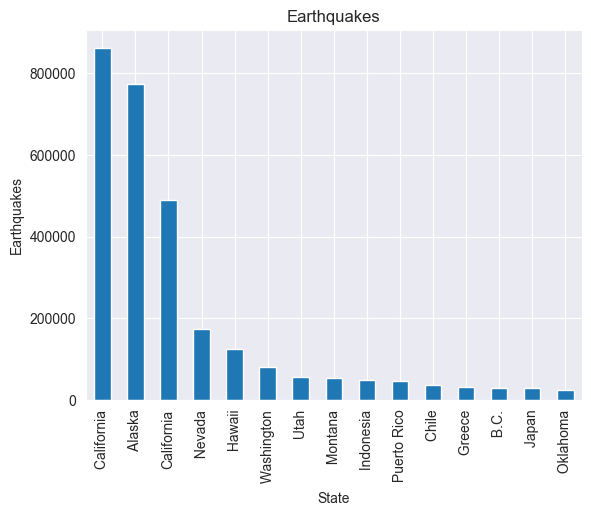

In [19]:
state_counts.head(15).plot(kind='bar', xlabel='State', ylabel='Earthquakes', title='Earthquakes')

In [20]:
significant_earthquakes = df['state'][df['significance'] > df['significance'].mean()].value_counts()

<Axes: title={'center': 'Significant Earthquakes'}, xlabel='State', ylabel='Earthquakes'>

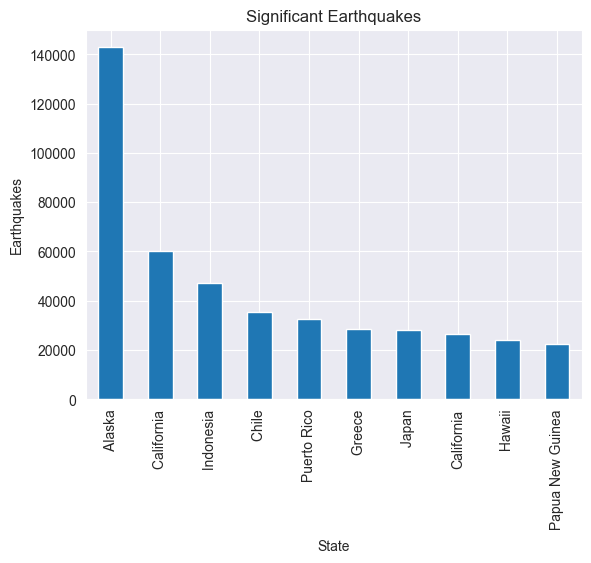

In [21]:
significant_earthquakes.head(10).plot(kind='bar', xlabel='State', ylabel='Earthquakes', title='Significant Earthquakes')

In [22]:
big_magnitudo_earthquakes = df['state'][df['magnitudo'] >= 6].value_counts()

<Axes: title={'center': 'Powerful Earthquakes'}, xlabel='State', ylabel='Earthquakes'>

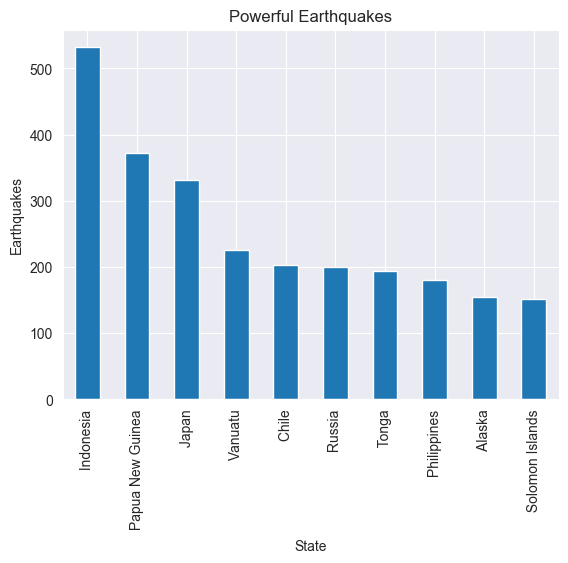

In [23]:
big_magnitudo_earthquakes.head(10).plot(kind='bar', xlabel='State', ylabel='Earthquakes', title='Powerful Earthquakes')

In [24]:
small_magnitudo_earthquakes = df['state'][df['magnitudo'] <= 4].value_counts()

<Axes: title={'center': 'Powerful Earthquakes'}, xlabel='State', ylabel='Earthquakes'>

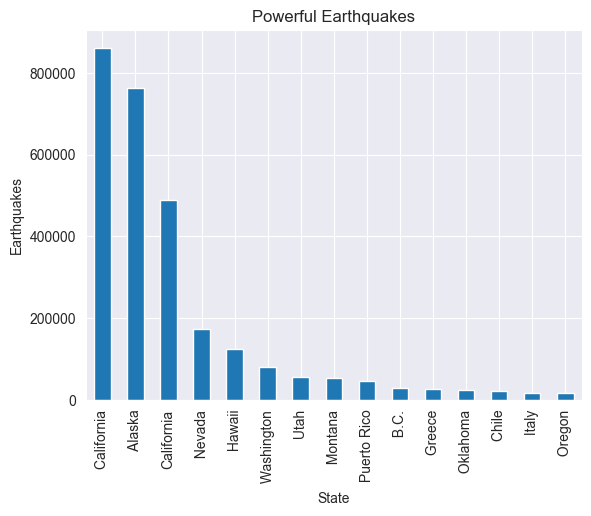

In [25]:
small_magnitudo_earthquakes.head(15).plot(kind='bar', xlabel='State', ylabel='Earthquakes', title='Powerful Earthquakes')

### The number of earthquakes at all time

In [26]:
df['year'] = df['date'].dt.year

<Axes: title={'center': 'Earthquakes at all time'}, xlabel='Year', ylabel='Earthquakes'>

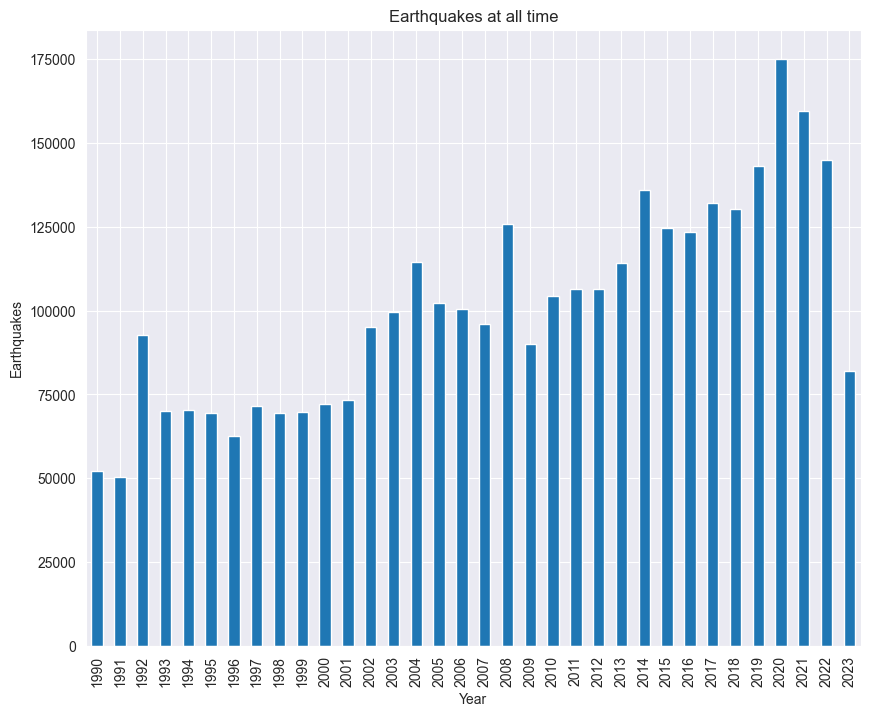

In [27]:
df['year'].value_counts(sort=False).plot(kind='bar', xlabel='Year', ylabel='Earthquakes', figsize=(10, 8), title='Earthquakes at all time')

<Axes: title={'center': 'Powerful earthquakes at all time'}, xlabel='Year', ylabel='Earthquakes'>

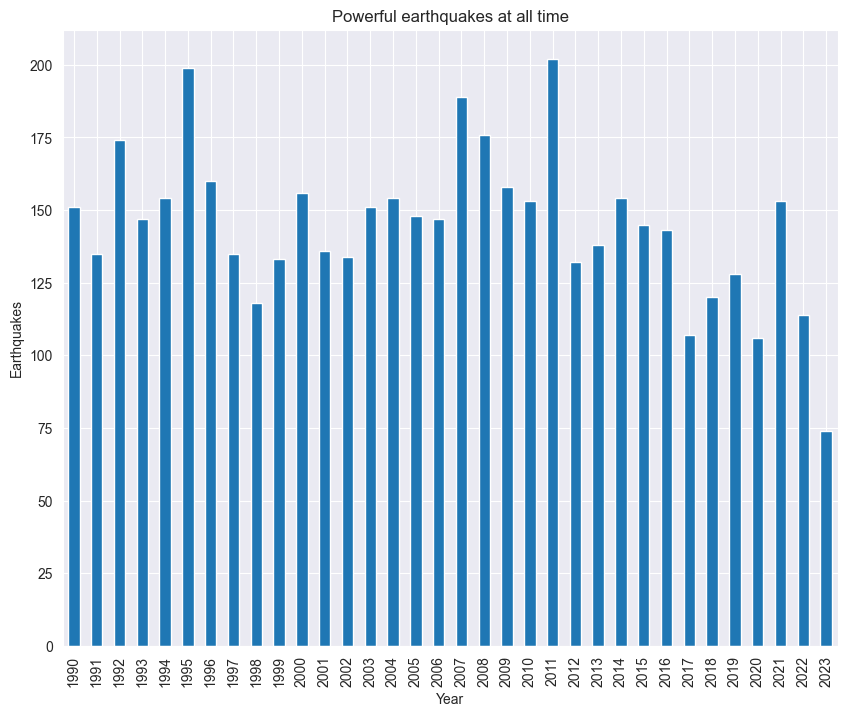

In [28]:
df['year'][df['magnitudo'] >= 6].value_counts(sort=False).plot(kind='bar', xlabel='Year', ylabel='Earthquakes', figsize=(10, 8), title='Powerful earthquakes at all time')

<Axes: title={'center': 'Significant earthquakes at all time'}, xlabel='Year', ylabel='Earthquakes'>

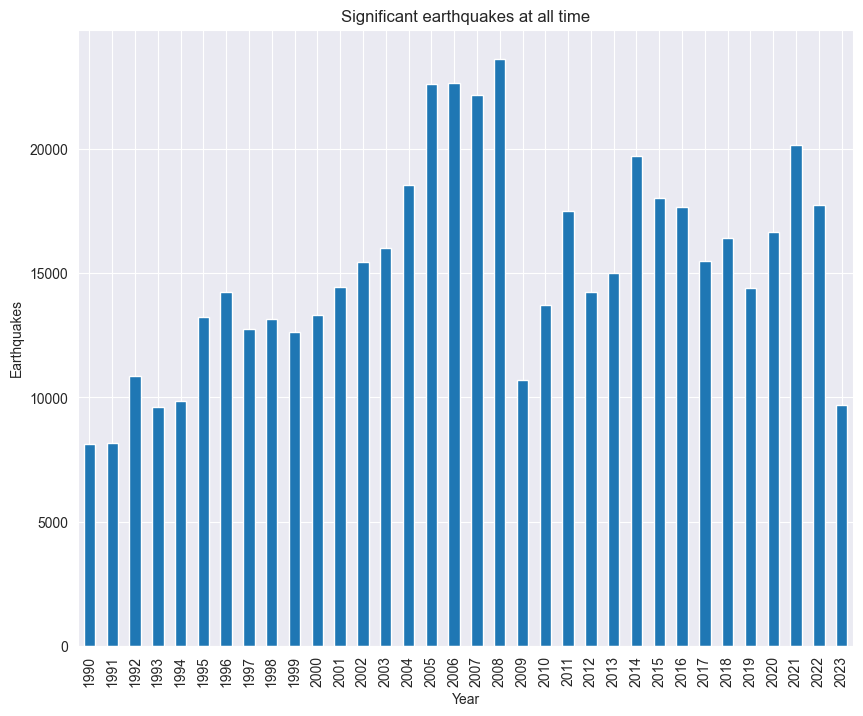

In [36]:
df['year'][df['significance'] >= df['significance'].mean() * 2].value_counts(sort=False).plot(kind='bar', xlabel='Year', ylabel='Earthquakes', figsize=(10, 8), title='Significant earthquakes at all time')

### Dependence of significance on magnitude

<Axes: xlabel='magnitudo', ylabel='significance'>

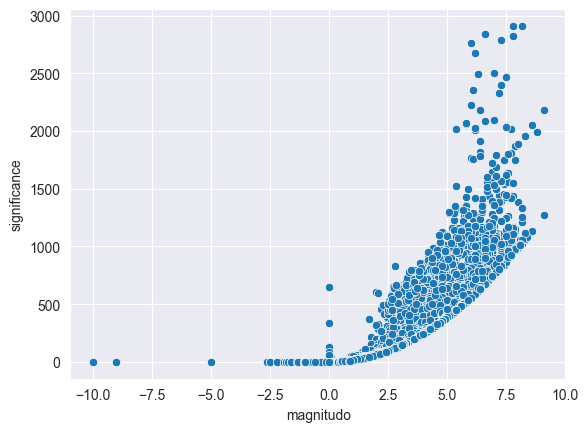

In [33]:
sns.scatterplot(data=df, y='significance', x='magnitudo')

### Heatmap of significant earthquakes for all time in all states

<Axes: xlabel='year', ylabel='state'>

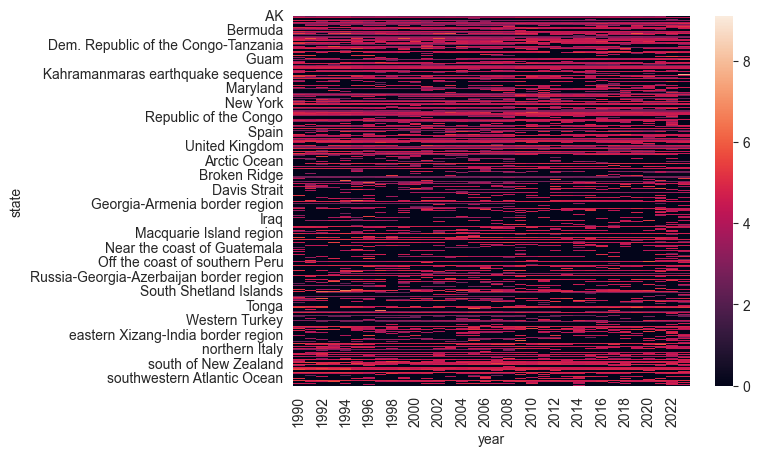

In [34]:
sns.heatmap(df[['state', 'year', 'magnitudo']][df['significance'] > df['significance'].mean()].pivot_table(index='state', columns='year', values='magnitudo', fill_value=0))